In [1]:
import pandas as pd

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
%ls datasets/'Canada.xlsx'

datasets/Canada.xlsx


In [5]:
path = 'datasets/Canada.xlsx'
df = pd.read_excel(path,engine = 'openpyxl',
                   sheet_name = 'Canada by Citizenship',
                   skiprows = range(20),
                   skipfooter = 2)

In [6]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV','Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50','Unnamed: 43'], axis = 1, inplace = True)

In [8]:
df.columns

Index([  'OdName', 'AreaName',  'RegName',  'DevName',       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013],
      dtype='object')

In [9]:
df.rename(columns = {'OdName' : 'Country' , 'AreaName' : 'Continent' , 'RegName' : 'Region'}, inplace = True)


## Description of Datasets

* This datasets represents the migration from various countries to Canada

## Variables of interest
* Country - represents the origin of the people, being a categorical variable
* Continent - ...
...
* 1920 - 2013 - ...

In [10]:
df.columns = list(map(str, df.columns))
df.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [11]:
df.set_index('Country', inplace = True)

In [12]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [13]:
df['Total'] = df.iloc[:, 2 :].sum(axis = 1)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


In [14]:
df.iloc[:,2]

Country
Afghanistan       Developing regions
Albania            Developed regions
Algeria           Developing regions
American Samoa    Developing regions
Andorra            Developed regions
                         ...        
NaN                              NaN
NaN                              NaN
NaN                              NaN
NaN                              NaN
NaN                              NaN
Name: DevName, Length: 1013, dtype: object

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
mpl.style.use('ggplot')

Text(0.5, 0, 'Years')

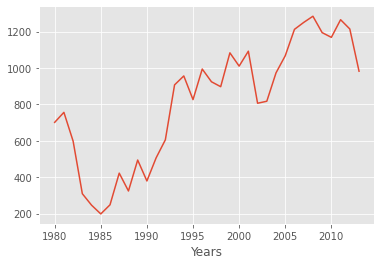

In [17]:
df.loc['Japan','1980':'2013'].plot()
plt.xlabel('Years')

Text(0.5, 1.0, 'India vs. China')

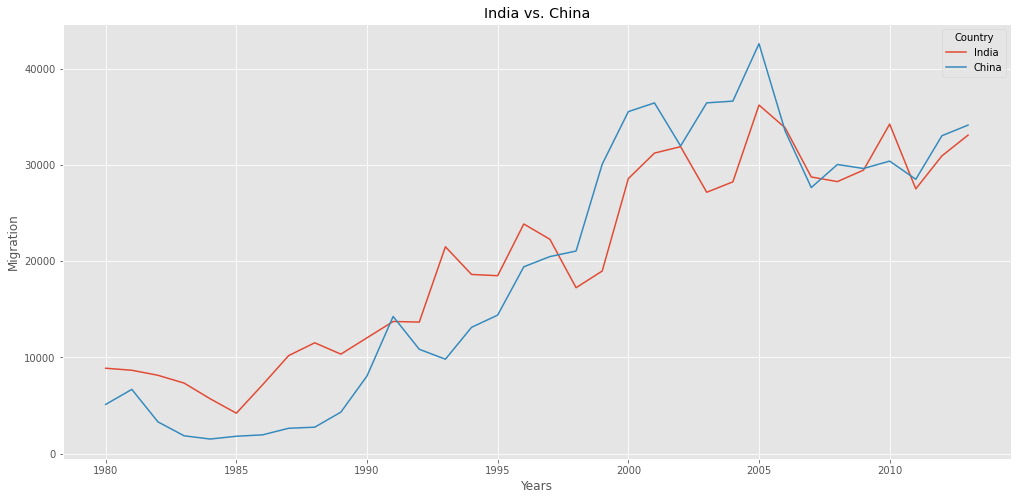

In [18]:
ic_data = df.loc[['India','China'],'1980':'2013']
nic = ic_data.transpose()
nic.plot(figsize = (17,8))
plt.xlabel('Years')
plt.ylabel('Migration')
plt.title('India vs. China')

In [19]:
top5 = df.sort_values(['Total'], ascending = False, axis = 0)
top5.head(8)                 

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Total,World,World,World,143137.0,128641.0,121175.0,89185.0,88272.0,84346.0,99351.0,...,262242.0,251640.0,236753.0,247244.0,252170.0,280687.0,248748.0,257903.0,259021.0,6924212.0
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Unknown,World,World,World,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,13303.0,...,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0,515059.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0
United States of America,Northern America,Northern America,Developed regions,9378.0,10030.0,9074.0,7100.0,6661.0,6543.0,7074.0,...,8394.0,9613.0,9463.0,10190.0,8995.0,8142.0,7676.0,7891.0,8501.0,241122.0


Text(0.5, 1.0, 'India vs. China')

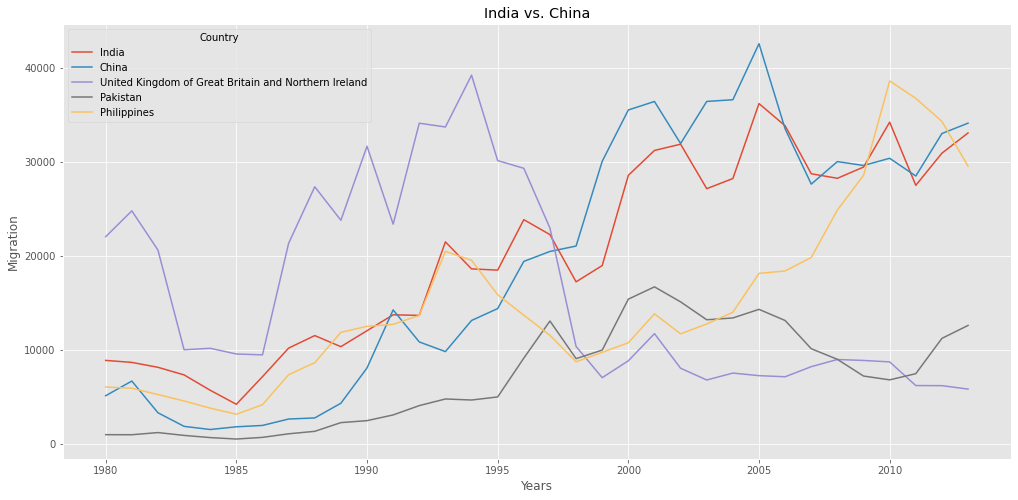

In [25]:
ic_data = df.loc[['India','China','United Kingdom of Great Britain and Northern Ireland','Pakistan','Philippines'],'1980':'2013']
cin = ic_data.transpose()
cin.plot(figsize = (17,8))
plt.xlabel('Years')
plt.ylabel('Migration')
plt.title('India vs. China')

In [21]:
top5.drop(['Continent','Region','DevName'], axis = 1, inplace = True)
top5.columns

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [22]:
top5.drop(['Total'], axis = 1, inplace = True)
top5.columns

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [24]:
x = top5.transpose()
x.plot()

KeyError: nan